In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import japanize_matplotlib # 追加
import pandas as pd

## データの読み込みと確認

In [14]:
# データの読み込み
data = load_breast_cancer()
X = data.data
y = data.target  # 悪性: 0, 良性: 1
data_df = pd.DataFrame(X, columns=data.feature_names)
data_df['target'] = data.target
print("データの基本情報:\n")
print(data_df.info())
print("\nデータの統計量:\n")
print(data_df.describe())

print("\nデータの一部を表示:\n")
print(data_df.head())

# データの変数: 項目名の出力
print("\nデータの変数:\n")
print(data_df.columns.tolist())

データの基本情報:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness erro

## k-means法によるクラスタリング

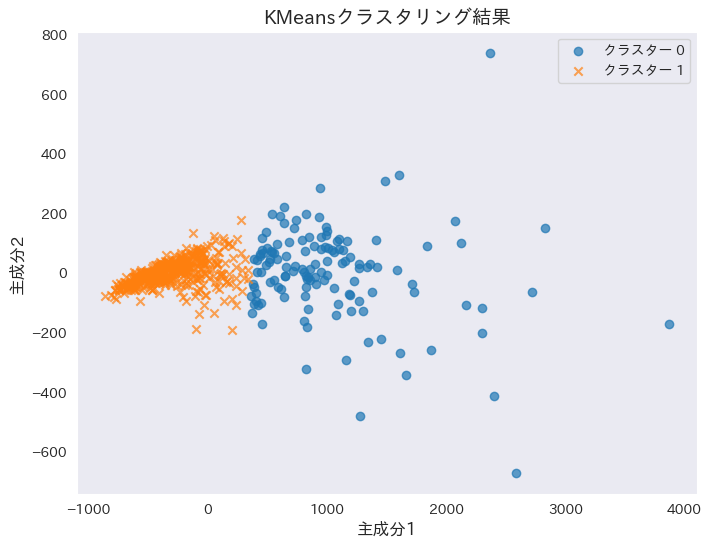

In [15]:
# データを2次元に縮約（PCA）
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

# KMeansクラスタリング
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# クラスタリング結果の可視化（異なるマーカーで区別）
plt.figure(figsize=(8, 6))
for cluster_label, marker in zip([0, 1], ['o', 'x']):
    plt.scatter(X_pca[clusters == cluster_label, 0],
                X_pca[clusters == cluster_label, 1],
                label=f'クラスター {cluster_label}',
                alpha=0.7,
                marker=marker)
plt.title('KMeansクラスタリング結果', fontsize=14)
plt.xlabel('主成分1', fontsize=12)
plt.ylabel('主成分2', fontsize=12)
plt.legend()
plt.grid()
plt.show()


In [16]:
# クラスタリング結果に元の特徴量データとラベルを結合
full_data = pd.DataFrame(X, columns=data.feature_names)
full_data['クラスタ'] = clusters
full_data['悪性(0)/良性(1)'] = y  # ラベルを追加

# クラスタ0とクラスタ1のデータを抽出
cluster_0_full = full_data[full_data['クラスタ'] == 0]
cluster_1_full = full_data[full_data['クラスタ'] == 1]

# クラスタ0とクラスタ1のデータをそれぞれ表示
print("クラスタ0に属するデータ（悪性/良性ラベル付き）:")
print(cluster_0_full.head())
print("\nクラスタ1に属するデータ（悪性/良性ラベル付き）:")
print(cluster_1_full.head())


クラスタ0に属するデータ（悪性/良性ラベル付き）:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38           122.8     1001.0          0.11840   
1        20.57         17.77           132.9     1326.0          0.08474   
2        19.69         21.25           130.0     1203.0          0.10960   
4        20.29         14.34           135.1     1297.0          0.10030   
6        18.25         19.98           119.6     1040.0          0.09463   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
4           0.13280          0.1980              0.10430         0.1809   
6           0.10900          0.1127              0.07400         0.1794   

   mean fractal dimension  ...  worst perimeter  worst area  worst